In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import (
  CamembertTokenizer,
  CamembertForSequenceClassification,
  Trainer,
  TrainingArguments,
)
import torch
print(torch.backends.mps.is_available())
print(torch.backends.mps.is_built())
from torch.utils.data import Dataset
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import tqdm as notebook_tqdm
import matplotlib.pyplot as plt
import sentencepiece
from french_preprocessing.french_preprocessing import FrenchPreprocessing

True
True


In [2]:
text = "text"
label = "label"
df = pd.read_csv("./data/cleaned_combined_dataset.csv")
df = df.dropna(subset=[text, label])

default_stopwords = [
  "y",
  "y'",
  "m",
  "l",
  "d",
  "t",
  "qu",
  "s",
  "c",
  "m'",
  "hein",
  "celle-là",
  "ceux-ci",
  "dring",
  "sa",
  "ollé",
  "en",
  "a",
  "d'",
  "plutôt",
  "auxquels",
  "celles-ci",
  "dès",
  "tel",
  "lui-meme",
  "quelle",
  "les",
  "dont",
  "aie",
  "quand",
  "pour",
  "où",
  "lès",
  "suivant",
  "ho",
  "memes",
  "hem",
  "surtout",
  "mien",
  "tellement",
  "qui",
  "le",
  "quels",
  "tant",
  "une",
  "tien",
  "ohé",
  "i",
  "mêmes",
  "ceux",
  "l'",
  "quelque",
  "si",
  "unes",
  "lequel",
  "tous",
  "chacune",
  "son",
  "que",
  "quel",
  "au",
  "ai",
  "celui-là",
  "chaque",
  "ouste",
  "es",
  "hep",
  "elles-mêmes",
  "lors",
  "cette",
  "cependant",
  "toc",
  "tsouin",
  "chacun",
  "seule",
  "siennes",
  "hum",
  "la",
  "certains",
  "t'",
  "trop",
  "dans",
  "desquels",
  "lui",
  "hors",
  "celles-là",
  "lui-même",
  "pouah",
  "toi-même",
  "boum",
  "vive",
  "rend",
  "mes",
  "vos",
  "nous",
  "qu'",
  "des",
  "tiens",
  "hé",
  "lorsque",
  "zut",
  "vlan",
  "mienne",
  "na",
  "ma",
  "selon",
  "s'",
  "vous-mêmes",
  "eh",
  "ah",
  "ses",
  "meme",
  "lesquels",
  "miens",
  "vôtres",
  "paf",
  "pif",
  "quant-à-soi",
  "tes",
  "c'",
  "sien",
  "ça",
  "lesquelles",
  "tout",
  "telles",
  "même",
  "ces",
  "maint",
  "notre",
  "quanta",
  "elle-même",
  "aupres",
  "bas",
  "votre",
  "plusieurs",
  "moi",
  "par",
  "hurrah",
  "bah",
  "laquelle",
  "auxquelles",
  "vé",
  "peux",
  "pure",
  "tiennes",
  "aujourd'hui",
  "hormis",
  "couic",
  "vous",
  "ore",
  "envers",
  "moindres",
  "aucune",
  "gens",
  "ouias",
  "cela",
  "quelles",
  "aux",
  "pff",
  "etc",
  "toutefois",
  "leurs",
  "ton",
  "clic",
  "las",
  "pfut",
  "t'",
  "toutes",
  "cet",
  "ta",
  "da",
  "toute",
  "aucun",
  "o",
  "sapristi",
  "quoi",
  "desquelles",
  "té",
  "vôtre",
  "euh",
  "pres",
  "as",
  "fi",
  "ci",
  "allo",
  "oh",
  "s'",
  "quiconque",
  "floc",
  "avec",
  "se",
  "bat",
  "tic",
  "jusqu",
  "qu'",
  "unique",
  "certes",
  "celles",
  "dire",
  "tienne",
  "ha",
  "nôtre",
  "jusque",
  "tac",
  "ceux-là",
  "sienne",
  "uns",
  "ouf",
  "moi-même",
  "et",
  "vers",
  "miennes",
  "autrefois",
  "houp",
  "été",
  "à",
  "d'",
  "nouveau",
  "être",
  "peu",
  "dite",
  "s'",
  "dit",
  "tels",
  "ou",
  "toi",
  "entre",
  "avoir",
  "hop",
  "delà",
  "nos",
  "tres",
  "telle",
  "voilà",
  "dessous",
  "soit",
  "autres",
  "psitt",
  "hélas",
  "anterieur",
  "hou",
  "près",
  "auquel",
  "juste",
  "chut",
  "un",
  "stop",
  "eux",
  "ès",
  "vifs",
  "ce",
  "quoique",
  "du",
  "moi-meme",
  "mon",
  "brrr",
  "sous",
  "parmi",
  "deja",
  "déja",
  "celle",
  "siens",
  "suffisant",
  "â",
  "l'",
  "apres",
  "sans",
  "soi-même",
  "là",
  "pur",
  "via",
  "differentes",
  "specifique",
  "holà",
  "tsoin",
  "pan",
  "car",
  "donc",
  "dits",
  "merci",
  "particulièrement",
  "nous-mêmes",
  "personne",
  "allô",
  "soi",
  "voici",
  "sur",
  "vif",
  "celle-ci",
  "malgré",
  "puis",
  "sauf",
  "autre",
  "hui",
  "ceci",
  "leur",
  "celui-ci",
  "necessairement",
  "sacrebleu",
  "hue",
  "eux-mêmes",
  "outre",
  "alors",
  "desormais",
  "plouf",
  "longtemps",
  "malgre",
  "après",
  "de",
  "oust",
  "neanmoins",
  "certain",
  "crac",
  "depuis",
  "olé",
  "hi",
  "te",
  "puisque",
  "m'",
  "me",
  "ô",
  "celui",
  "aussi",
  "rares",
  "chiche",
  "rien",
  "pfft",
  "c'",
  "vu",
  "clac",
  "duquel",
  "aavons",
  "avez",
  "ont",
  "eu",
  "avais",
  "avait",
  "avions",
  "aviez",
  "avaient",
  "eus",
  "eut",
  "eûmes",
  "eûtes",
  "eurent",
  "aurai",
  "auras",
  "aura",
  "aurons",
  "aurez",
  "auront",
  "aurais",
  "aurait",
  "aurions",
  "auriez",
  "auraient",
  "aies",
  "ait",
  "ayons",
  "ayez",
  "aient",
  "eusse",
  "eusses",
  "eût",
  "eussions",
  "eussiez",
  "eussent",
  "ayant",
  "suis",
  "est",
  "sommes",
  "êtes",
  "sont",
  "étais",
  "était",
  "étions",
  "étiez",
  "étaient",
  "fus",
  "fut",
  "fûmes",
  "fûtes",
  "furent",
  "serai",
  "seras",
  "sera",
  "serons",
  "serez",
  "seront",
  "serais",
  "serait",
  "serions",
  "seriez",
  "seraient",
  "sois",
  "soyons",
  "soyez",
  "soient",
  "fusse",
  "fusses",
  "fût",
  "fussions",
  "fussiez",
  "fussent",
  "étant",
]
default_symbols = """#§_-@+=*<>()[]{}/\\"'"""
default_punct = """!;:,.?-..."""

preprocessor = FrenchPreprocessing(
  stopwords=default_stopwords, symbols=default_symbols, punct=default_punct
)

Some weights of the model checkpoint at gilf/french-camembert-postag-model were not used when initializing CamembertForTokenClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing CamembertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
df["preprocessed_text"] = df[text].apply(preprocessor.preprocessing)

label_mapping = {label: idx for idx, label in enumerate(df[label].unique())}
df[label] = df[label].map(label_mapping)

X_train, X_test, y_train, y_test = train_test_split(
  df["preprocessed_text"], df[label], test_size=0.2, random_state=42
)

In [4]:
use_mps = torch.backends.mps.is_available() and torch.backends.mps.is_built()
device = torch.device("mps" if use_mps else "cpu")
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")
model = CamembertForSequenceClassification.from_pretrained(
  "camembert-base", num_labels=len(label_mapping)
).to(device)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
class TextDataset(Dataset):
  def __init__(self, texts, labels):
    self.encodings = tokenizer(
      texts.tolist(), truncation=True, padding=True, max_length=512
    )
    self.labels = labels.tolist()

  def __getitem__(self, idx):
    item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    item["labels"] = torch.tensor(self.labels[idx])
    return item

  def __len__(self):
    return len(self.labels)

In [6]:
train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)

In [7]:
training_args = TrainingArguments(
  output_dir="./results",
  num_train_epochs=3,
  per_device_train_batch_size=8,
  per_device_eval_batch_size=8,
  warmup_steps=500,
  weight_decay=0.01,
  logging_dir="./logs",
  logging_steps=10,
  eval_strategy="epoch",
  use_cpu=True,
)

trainer = Trainer(
  model=model,
  args=training_args,
  train_dataset=train_dataset,
  eval_dataset=test_dataset,
)

trainer.train()
trainer.evaluate()

  0%|          | 0/3993 [00:00<?, ?it/s]

{'loss': 0.6952, 'grad_norm': 1.7061744928359985, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.01}
{'loss': 0.6933, 'grad_norm': 1.1672435998916626, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.02}
{'loss': 0.6935, 'grad_norm': 7.38837194442749, 'learning_rate': 3e-06, 'epoch': 0.02}
{'loss': 0.6947, 'grad_norm': 1.184401512145996, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.03}
{'loss': 0.6869, 'grad_norm': 2.21279239654541, 'learning_rate': 5e-06, 'epoch': 0.04}
{'loss': 0.6804, 'grad_norm': 1.8265693187713623, 'learning_rate': 6e-06, 'epoch': 0.05}
{'loss': 0.6698, 'grad_norm': 0.9629998803138733, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.05}
{'loss': 0.6634, 'grad_norm': 0.9195653200149536, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.06}
{'loss': 0.6936, 'grad_norm': 1.3664164543151855, 'learning_rate': 9e-06, 'epoch': 0.07}
{'loss': 0.6816, 'grad_norm': 1.0876338481903076, 'learning_rate': 1e-05, 'epoch': 0.08}
{'loss': 0.6977, 'grad_norm': 0.8

  0%|          | 0/333 [00:00<?, ?it/s]

{'eval_loss': 0.4829116761684418, 'eval_runtime': 66.6077, 'eval_samples_per_second': 39.95, 'eval_steps_per_second': 4.999, 'epoch': 1.0}
{'loss': 0.4538, 'grad_norm': 3.4090967178344727, 'learning_rate': 3.797595190380762e-05, 'epoch': 1.01}
{'loss': 0.4391, 'grad_norm': 6.168318271636963, 'learning_rate': 3.783280847409104e-05, 'epoch': 1.01}
{'loss': 0.5107, 'grad_norm': 10.41594409942627, 'learning_rate': 3.768966504437447e-05, 'epoch': 1.02}
{'loss': 0.4781, 'grad_norm': 21.751920700073242, 'learning_rate': 3.754652161465789e-05, 'epoch': 1.03}
{'loss': 0.6006, 'grad_norm': 11.422160148620605, 'learning_rate': 3.740337818494131e-05, 'epoch': 1.04}
{'loss': 0.3992, 'grad_norm': 6.231173515319824, 'learning_rate': 3.726023475522474e-05, 'epoch': 1.04}
{'loss': 0.3835, 'grad_norm': 5.060747146606445, 'learning_rate': 3.711709132550816e-05, 'epoch': 1.05}
{'loss': 0.4839, 'grad_norm': 4.025745868682861, 'learning_rate': 3.697394789579158e-05, 'epoch': 1.06}
{'loss': 0.4525, 'grad_nor

  0%|          | 0/333 [00:00<?, ?it/s]

{'eval_loss': 0.45450475811958313, 'eval_runtime': 66.6455, 'eval_samples_per_second': 39.928, 'eval_steps_per_second': 4.997, 'epoch': 2.0}
{'loss': 0.3733, 'grad_norm': 4.587376594543457, 'learning_rate': 1.8937875751503005e-05, 'epoch': 2.01}
{'loss': 0.2573, 'grad_norm': 1.3572782278060913, 'learning_rate': 1.8794732321786433e-05, 'epoch': 2.01}
{'loss': 0.4175, 'grad_norm': 10.148234367370605, 'learning_rate': 1.8651588892069855e-05, 'epoch': 2.02}
{'loss': 0.3858, 'grad_norm': 1.329156756401062, 'learning_rate': 1.850844546235328e-05, 'epoch': 2.03}
{'loss': 0.3771, 'grad_norm': 1.0849113464355469, 'learning_rate': 1.8365302032636702e-05, 'epoch': 2.04}
{'loss': 0.4358, 'grad_norm': 2.727477788925171, 'learning_rate': 1.8222158602920127e-05, 'epoch': 2.04}
{'loss': 0.2565, 'grad_norm': 9.287429809570312, 'learning_rate': 1.8079015173203552e-05, 'epoch': 2.05}
{'loss': 0.5882, 'grad_norm': 7.584367275238037, 'learning_rate': 1.7935871743486977e-05, 'epoch': 2.06}
{'loss': 0.2858, 

  0%|          | 0/333 [00:00<?, ?it/s]

{'eval_loss': 0.5371719598770142, 'eval_runtime': 67.4711, 'eval_samples_per_second': 39.439, 'eval_steps_per_second': 4.935, 'epoch': 3.0}
{'train_runtime': 4130.4946, 'train_samples_per_second': 7.73, 'train_steps_per_second': 0.967, 'train_loss': 0.4712660678968136, 'epoch': 3.0}


  0%|          | 0/333 [00:00<?, ?it/s]

{'eval_loss': 0.5371719598770142,
 'eval_runtime': 67.2095,
 'eval_samples_per_second': 39.593,
 'eval_steps_per_second': 4.955,
 'epoch': 3.0}

  0%|          | 0/333 [00:00<?, ?it/s]

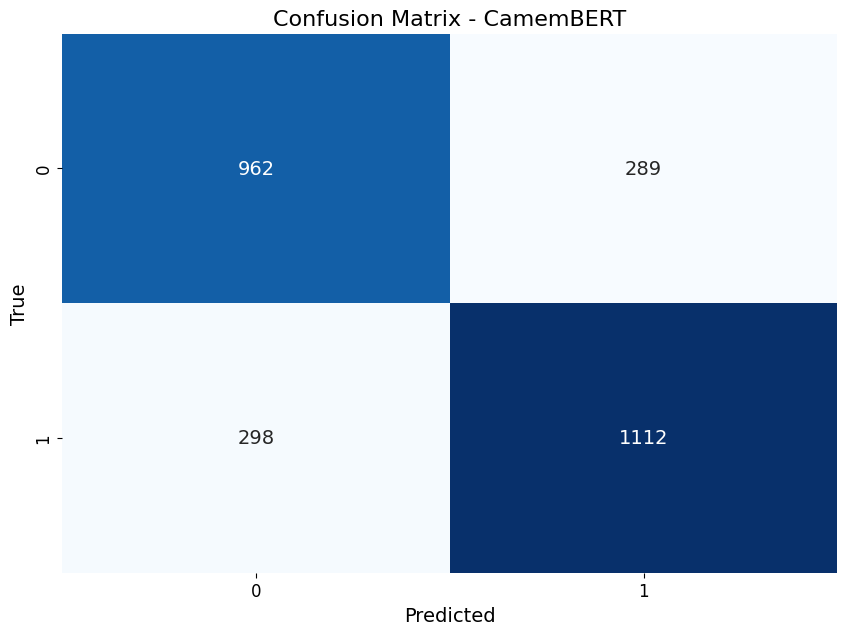

[[ 962  289]
 [ 298 1112]]


In [8]:
predictions = trainer.predict(test_dataset)
y_pred = torch.argmax(torch.tensor(predictions.predictions), axis=1).numpy()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.title("Confusion Matrix - CamemBERT", fontsize=16)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print(cm)

In [9]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

model.save_pretrained("./models/camembert_model")
tokenizer.save_pretrained("./models/camembert_model")

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.77      1251
           1       0.79      0.79      0.79      1410

    accuracy                           0.78      2661
   macro avg       0.78      0.78      0.78      2661
weighted avg       0.78      0.78      0.78      2661

Accuracy Score: 0.7794062382562946


('./models/camembert_model/tokenizer_config.json',
 './models/camembert_model/special_tokens_map.json',
 './models/camembert_model/sentencepiece.bpe.model',
 './models/camembert_model/added_tokens.json')